In [55]:
import numpy as np
import pandas as pd
import sys
from collections import Counter
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
from imblearn.over_sampling import SMOTE
from collections import Counter


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!pip install pyspellchecker
from spellchecker import SpellChecker

     |████████████████████████████████| 2.7MB 9.5MB/s 


In [ ]:
sys.path.append('/content/drive/MyDrive/Capstone/Product Recommender system')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone/Product Recommender system/sample30.csv')

In [ ]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [ ]:
df.shape

(30000, 15)

In [ ]:
df.isna().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [ ]:
Counter(df['user_sentiment'])

Counter({'Negative': 3367, 'Positive': 26632, nan: 1})

In [ ]:
Counter(df['user_sentiment'][df['reviews_title'].isna()])

Counter({'Negative': 22, 'Positive': 168})

In [ ]:
duplicate = df[df['id'].duplicated()]

In [ ]:
duplicate.shape

(29729, 15)

In [ ]:
#data overview
print('Rows: ', df.shape[0])
print('columns: ', df.shape[1])
print('\nfeatures: ', df.columns.tolist())
print('\nMissing values: ', df.isnull().values.sum())
print('\nUnique values: \n', df.nunique() )

Rows:  30000
columns:  15

features:  ['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_userCity', 'reviews_userProvince', 'reviews_username', 'user_sentiment']

Missing values:  74980

Unique values: 
 id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18535
reviews_userCity          977
reviews_userProvince       42
reviews_username        24914
user_sentiment              2
dtype: int64


In [ ]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [ ]:
df['reviews_title']= df['reviews_title'].fillna(' ')

In [ ]:
df['reviews_title'].isna().sum()

0

In [ ]:
df['user_sentiment']=df['user_sentiment'].fillna('Negative')

In [ ]:
df['user_sentiment'].isna().sum()

0

In [ ]:



df_master = df[['reviews_rating',
       'reviews_text', 'reviews_title','user_sentiment']].copy()

In [ ]:


df_master.head()

,reviews_rating,reviews_text,reviews_title,user_sentiment
0,5,i love this album. it's very good. more to the...,Just Awesome,Positive
1,5,Good flavor. This review was collected as part...,Good,Positive
2,5,Good flavor.,Good,Positive
3,1,I read through the reviews on here before look...,Disappointed,Negative
4,1,My husband bought this gel for us. The gel cau...,Irritation,Negative


In [ ]:
df_master['merged'] = df['reviews_title'] + " " + df['reviews_text']

In [ ]:
df_master['merged'].iloc[0]

"Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy."

In [ ]:
df_master.head()

,reviews_rating,reviews_text,reviews_title,user_sentiment,merged
0,5,i love this album. it's very good. more to the...,Just Awesome,Positive,Just Awesome i love this album. it's very good...
1,5,Good flavor. This review was collected as part...,Good,Positive,Good Good flavor. This review was collected as...
2,5,Good flavor.,Good,Positive,Good Good flavor.
3,1,I read through the reviews on here before look...,Disappointed,Negative,Disappointed I read through the reviews on her...
4,1,My husband bought this gel for us. The gel cau...,Irritation,Negative,Irritation My husband bought this gel for us. ...


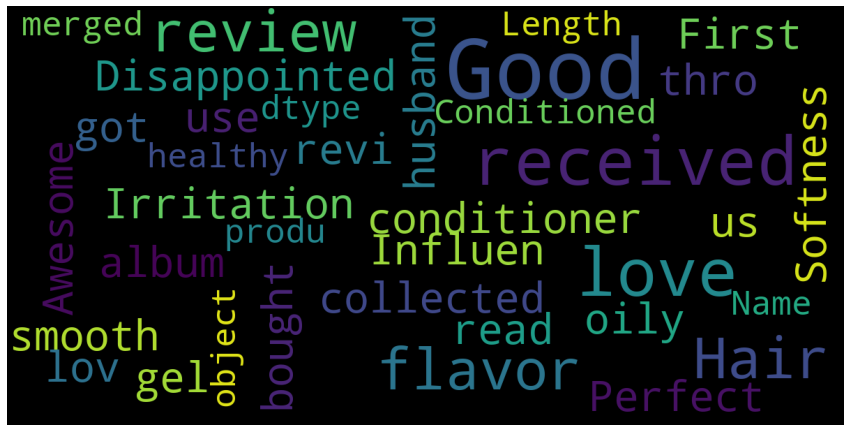

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
    background_color = 'black',
    stopwords=stopwords,
    max_words=200,
    max_font_size=40,
    scale=3,
    random_state=1 #choose at random
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top = 2.3)
        
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df_master['merged'])

In [ ]:

stop = stopwords
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [ ]:
df_master['merged'] = df_master['merged'].apply(lambda A: re.sub(r'[^\w\s]',' ',A))
df_master['merged'] = df_master['merged'].apply(lambda X: re.sub(r'\_',' ',X))

In [ ]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews_rating  30000 non-null  int64 
 1   reviews_text    30000 non-null  object
 2   reviews_title   30000 non-null  object
 3   user_sentiment  30000 non-null  object
 4   merged          30000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [ ]:
df_master['merged'][0]

'Just Awesome i love this album  it s very good  more to the hip hop side than her current pop sound   SO HYPE  i listen to this everyday at the gym  i give it 5star rating all the way  her metaphors are just crazy '

In [ ]:
# #df_master['merged']= [x for x in df_master.index]
# for i in df_master.index:
#   #df_master['merged'][0].map(re.sub(br'[^\w\s]',' ',df_master['merged'][0]))
#   df_master['merged'][i]=  re.sub(r'[^\w\s]',' ',df_master['merged'][i])#str(df_master['merged'][i], 'utf-8', 'ignore'))
#   df_master['merged'][i]=  re.sub(r'\_',' ',df_master['merged'][i])
    
#   print(df_master['merged'][i])

In [ ]:
df_master['merged'] = df_master['merged'].apply(lambda x: x.lower())

In [ ]:
df_master['merged'] =df_master['merged'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews_rating  30000 non-null  int64 
 1   reviews_text    30000 non-null  object
 2   reviews_title   30000 non-null  object
 3   user_sentiment  30000 non-null  object
 4   merged          30000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [ ]:
df_master['merged'][3]

'disappointed read reviews looking buying one couples lubricants ultimately disappointed didn t even live reviews read starters neither boyfriend notice sort enhanced captivating sensation notice messy consistency reminiscent liquid y vaseline difficult clean pleasant especially lacked captivating sensation expecting m disappointed paid much lube won t use use normal personal lubricant 1 less money 2 less mess'

In [ ]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews_rating  30000 non-null  int64 
 1   reviews_text    30000 non-null  object
 2   reviews_title   30000 non-null  object
 3   user_sentiment  30000 non-null  object
 4   merged          30000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = SnowballStemmer("english")
spell = SpellChecker()

NameError: ignored

In [ ]:
def stem_correct_lemmatize_text(text):
  temp = [spell.correction(stemmer.stem(w)) for w in w_tokenizer.tokenize(text)] 
  return [lemmatizer.lemmatize(w) for w in temp]

In [ ]:
df_master['processed'] = df_master['merged'].apply(lambda x: stem_correct_lemmatize_text(x))

In [47]:
df_master['processed'][4]

['ifrit',
 'husband',
 'bought',
 'gel',
 'u',
 'gel',
 'caus',
 'ifrit',
 'felt',
 'burn',
 'skin',
 'wouldn',
 'i',
 'recommend',
 'gel']

In [44]:
#df_master.to_csv('/content/drive/MyDrive/Capstone/Product Recommender system/processed.csv')

In [ ]:
test = ['Softness', 'I', 'got', 'conditioner', 'Influenster','walking','babies','dogs','condit', 'healthi', 'i', 'receiv', 'product']

In [46]:
df_master['merged'] [4]

'irritation husband bought gel us gel caused irritation felt burning skin wouldn t recommend gel'

In [49]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [68]:
X=df_master['processed'].copy()
y=df_master['user_sentiment'].copy()

In [72]:
X = [" ".join(i) for i in X]
X

['awesome love album i good hip hop side current pop sound hype listen everyday gym give star rate way metaphor crazy',
 'good good flavor review collect part promote',
 'good good flavor',
 'disappoint read review look buy one coupl rubric ultima disappoint didn i even live review read starter neither boyfriend notice sort enhance captive sensate notice mess consist reminisce liquid y vaseline difficult clean pleasant espect lack captive sensate expect i disappoint paid much lube won i use use normal person rubric 1 le money 2 le mess',
 'ifrit husband bought gel u gel caus ifrit felt burn skin wouldn i recommend gel',
 'worth boyfriend bought spice thing bedroom high disappoint product bought one absolut love ky mine thought similar affect absolut noth buy',
 'disappoint bought earlier today exit check base product describe expect someth regular ky fan expect left littl disappoint',
 'happi bought product husband tri impress ting warm left u stick use ky product past love ky one disa

In [73]:
len(X)

30000

In [78]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1,1),
    max_features=10000)
word_vectorizer.fit(X)
X = word_vectorizer.transform(X)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=101)

In [80]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_sample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({'Positive': 18641, 'Negative': 2359})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After Counter({'Positive': 18641, 'Negative': 18641})


In [81]:
X_train

<21000x9690 sparse matrix of type '<class 'numpy.float64'>'
	with 307936 stored elements in Compressed Sparse Row format>

In [82]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train_sm, y_train_sm)
r_pred = classifier.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score
rf_accuracy = accuracy_score(r_pred, y_test)
rf_accuracy

0.8991111111111111

In [84]:
from sklearn.svm import LinearSVC

In [102]:
model = LinearSVC()

In [103]:
model.fit(X_train_sm, y_train_sm)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [104]:
svm_pred = model.predict(X_test)

In [105]:
rf_accuracy_svm = accuracy_score(svm_pred, y_test)
rf_accuracy_svm

0.8557777777777777

In [114]:
from xgboost import XGBClassifier
XGB = XGBClassifier(learning_rate=0.05,max_depth=5)

In [115]:
XGB.fit(X_train_sm,y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [116]:
XGB_pred = XGB.predict(X_test)

In [117]:
rf_accuracy_xgb = accuracy_score(XGB_pred, y_test)
rf_accuracy_xgb

0.8213333333333334